In [7]:
import os
from itertools import chain, combinations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.animation as animation
import numpy as np
from scipy.linalg import polar
from scipy.spatial.transform import Rotation as Rot
import math

SIZE=10
# Latex interpretation for plots
plt.rcParams.update({'font.size': SIZE})
#plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["figure.subplot.left"] = 0.045
plt.rcParams["figure.subplot.bottom"] = 0.08
plt.rcParams["figure.subplot.right"] = 0.995
plt.rcParams["figure.subplot.top"] = 0.891
plt.rcParams["figure.subplot.wspace"] = 0.21
plt.rcParams["figure.subplot.hspace"] = 0.44
plt.rcParams['figure.figsize'] = 8,8 #
plt.rc('font', size=SIZE)            # controls default text sizes
plt.rc('axes', titlesize=SIZE)       # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)       # fontsize of the x and y labels
plt.rc('xtick', labelsize=SIZE)      # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE)      # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE)      # legend fontsize
plt.rc('figure', titlesize=SIZE)     #
#

In [ ]:
def nodes_15():
   X= [0,1]
   Y= [0,0]   
   fig,axs = plt.subplots(1,1,subplot_kw=dict(projection='3d'))
   axs.plot(X,Y)
   plt.show()

In [8]:

def shape_quad_8(input,lengths=[1,1,1]):
    #isbn 978-93-90385-27-0
    # eqn 13.5.2
    # input xi,eta,zeta
    # lengths l1,l2,l3
    val = ""
    xi,eta,zeta = np.array(input)
    l1,l2,l3 = lengths
    #phi_i = c[0] + c[1]*eta + c[2]*eta + c[3]*zeta + c[4]*xi*eta + c[5]*xi*zeta + c[6]*eta*zeta+c[7]*xi*eta*zeta
    Nodal_shape = [(1-xi/l1)*(1-eta/l2)*(1-zeta/l3), #1
                    (  xi/l1)*(1-eta/l2)*(1-zeta/l3), #2
                    (1-xi/l1)*(  eta/l2)*(1-zeta/l3), #3
                    (  xi/l1)*(  eta/l2)*(1-zeta/l3), #4
                    (1-xi/l1)*(1-eta/l2)*(  zeta/l3), #5
                    (  xi/l1)*(1-eta/l2)*(  zeta/l3), #6
                    (1-xi/l1)*(  eta/l2)*(  zeta/l3), #7
                    (  xi/l1)*(  eta/l2)*(  zeta/l3)] #8
    print("N = ",Nodal_shape,"")
    return Nodal_shape
#
def shape_diff(input,xyz,lengths=[1,1,1]):
    #isbn 978-93-90385-27-0
    # eqn 13.5.2
    # input xi,eta,zeta
    # lengths l1,l2,l3
    xi,eta,zeta = np.array(input)
    l1,l2,l3 = lengths
    dN_xi   = np.array([(-1/l1)*(1-eta/l2)*(1-zeta/l3), #1
                        ( 1/l1)*(1-eta/l2)*(1-zeta/l3), #2
                        (-1/l1)*(  eta/l2)*(1-zeta/l3), #3
                        ( 1/l1)*(  eta/l2)*(1-zeta/l3), #4
                        (-1/l1)*(1-eta/l2)*(  zeta/l3), #5
                        ( 1/l1)*(1-eta/l2)*(  zeta/l3), #6
                        (-1/l1)*(  eta/l2)*(  zeta/l3), #7
                        ( 1/l1)*(  eta/l2)*(  zeta/l3)])#8
    
    dN_eta  = np.array([(1-xi/l1)*(-1/l2)*(1-zeta/l3), #1
                        (  xi/l1)*(-1/l2)*(1-zeta/l3), #2
                        (1-xi/l1)*( 1/l2)*(1-zeta/l3), #3
                        (  xi/l1)*( 1/l2)*(1-zeta/l3), #4
                        (1-xi/l1)*(-1/l2)*(  zeta/l3), #5
                        (  xi/l1)*(-1/l2)*(  zeta/l3), #6
                        (1-xi/l1)*( 1/l2)*(  zeta/l3), #7
                        (  xi/l1)*( 1/l2)*(  zeta/l3)])#8
    
    dN_zeta = np.array([(1-xi/l1)*(1-eta/l2)*(-1/l3), #1
                        (  xi/l1)*(1-eta/l2)*(-1/l3), #2
                        (1-xi/l1)*(  eta/l2)*(-1/l3), #3
                        (  xi/l1)*(  eta/l2)*(-1/l3), #4
                        (1-xi/l1)*(1-eta/l2)*( 1/l3), #5
                        (  xi/l1)*(1-eta/l2)*( 1/l3), #6
                        (1-xi/l1)*(  eta/l2)*( 1/l3), #7
                        (  xi/l1)*(  eta/l2)*( 1/l3)])#8
    #
    #print(len(dN_zeta.T),len(xyz[0]),l1)
    F11= np.matmul(dN_xi,xyz[0])
    F21= np.matmul(dN_xi,xyz[1])
    F31= np.matmul(dN_xi,xyz[2])

    F12= np.matmul(dN_eta,xyz[0])
    F22= np.matmul(dN_eta,xyz[1])
    F32= np.matmul(dN_eta,xyz[2])

    F13= np.matmul(dN_zeta,xyz[0])
    F23= np.matmul(dN_zeta,xyz[1])
    F33= np.matmul(dN_zeta,xyz[2])

    F = np.array([[F11,F12,F13],
                  [F21,F22,F23],
                  [F31,F32,F33]])
    return F 
#
def mapping(fin_shape,poi):
    x_fin,y_fin,z_fin=fin_shape
    shape = shape_quad_8(poi)
    #print("x=",np.dot(np.array(x_fin),shape))
    #print("y=",np.dot(np.array(y_fin),shape))
    #print("z=",np.dot(np.array(z_fin),shape))
    v1 = np.dot(np.array(x_fin),shape)
    v2 = np.dot(np.array(y_fin),shape)
    v3 = np.dot(np.array(z_fin),shape)
    return v1,v2,v3

def print_latex(matrix,val):
    preamble= val+"&=\\begin{bmatrix}"
    print(preamble)

    for val in matrix:
        print("  &".join(str(val)[1:-1].split()),"\\\\")
    print("\end{bmatrix}\\\\")
   ##
def normalize_vector(vect,magnitude=False):
    value= 0
    final = vect
    for i in vect:
        value+=(i**2)
    mag=(value)**0.5
    for i in range(len(vect)):
        final[i] = final[i]/mag
    if magnitude:
        return [final,mag]
    else:
        return final

def draw_cube(ax,X,Y,Z,col="r",alp=0.1):
    # assume kasmer numbering
    top = [4,5,7,6]
    bottom = [0,1,3,2]
    left = [3,7,6,2]
    right = [0,1,5,4]
    front = [1,3,7,5]
    back = [0,2,6,4]
    for side in [top,bottom,left,right,front,back]:
        X_vals = [X[i] for i in side]
        Y_vals = [Y[i] for i in side]
        Z_vals = [Z[i] for i in side]
        verts = [list(zip(X_vals,Y_vals,Z_vals))]
        ax.add_collection3d(Poly3DCollection(verts,color=col,alpha=alp))
#

In [9]:
#
def mapping(fin_shape,poi):
    x_fin,y_fin,z_fin=fin_shape
    shape = shape_quad_8(poi)
    #print("x=",np.dot(np.array(x_fin),shape))
    #print("y=",np.dot(np.array(y_fin),shape))
    #print("z=",np.dot(np.array(z_fin),shape))
    v1 = np.dot(np.array(x_fin),shape)
    v2 = np.dot(np.array(y_fin),shape)
    v3 = np.dot(np.array(z_fin),shape)
    return v1,v2,v3
        
def vect_to_azim_elev(vect):
    x,y,z = vect
    #mag_tot = (x**2 +y**2 +z**2)**0.5
    mag_xy = (x**2 +y**2)**0.5
    azi = math.degrees(math.asin(y/mag_xy))
    ele = math.degrees(math.atan(z/mag_xy))
    return [ele,azi]

def print_latex(matrix,val):
    preamble= val+"&=\\begin{bmatrix}"
    print(preamble)

    for val in matrix:
        print("  &".join(str(val)[1:-1].split()),"\\\\")
    print("\end{bmatrix}\\\\")
   ##
def normalize_vector(vect,magnitude=False):
    value= 0
    final = vect
    for i in vect:
        value+=(i**2)
    mag=(value)**0.5
    for i in range(len(vect)):
        final[i] = final[i]/mag
    if magnitude:
        return [final,mag]
    else:
        return final


ca1_b.txt
C&=\begin{bmatrix}
2.12496378e+00  &-1.87497126e+00  &-2.93300000e-05 \\
-1.87497126e+00  &2.12489213e+00  &4.33000000e-06 \\
-2.93300000e-05  &4.33000000e-06  &1.56254134e+00 \\
\end{bmatrix}\\
F&=\begin{bmatrix}
1.1437  &-0.9508  &0.7677 \\
0.2303  &0.435  &-0.4134 \\
-0.874  &1.0157  &0.8957 \\
\end{bmatrix}\\
J&= 1.2498925193110002 \\
************

[array([0.57735074, 0.57733722, 0.57736285]), 0.9584206344196071]
************

V&=\begin{bmatrix}
1.60544866  &-0.23273718  &-0.41206991 \\
-0.23273718  &0.58985194  &-0.1052176 \\
-0.41206991  &-0.1052176  &1.55464743 \\
\end{bmatrix}\\
R&=\begin{bmatrix}
0.71654228  &-0.33072133  &0.61415842 \\
0.6141731  &0.71653564  &-0.33070845 \\
-0.33069406  &0.61416617  &0.71654823 \\
\end{bmatrix}\\
U&=\begin{bmatrix}
1.24998008e+00  &-7.50009055e-01  &-1.23213679e-05 \\
-7.50009055e-01  &1.24995142e+00  &-1.96448017e-06 \\
-1.23213679e-05  &-1.96448017e-06  &1.25001654e+00 \\
\end{bmatrix}\\
C&=\begin{bmatrix}
2.19800395  &-1.7763719

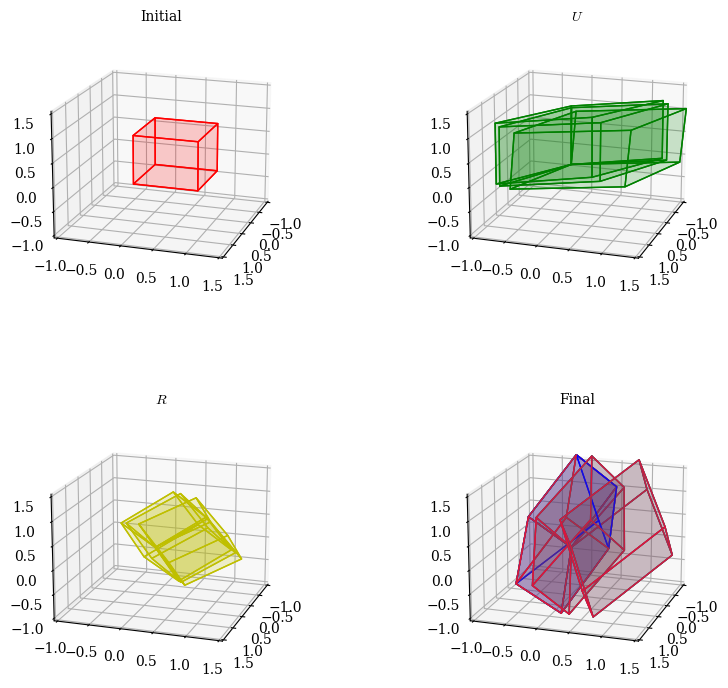

In [10]:
#
def demo():
    show = True
    #show = False
    #
    ini_col = "r"
    fin_col = "b"
    fin_col1 = "crimson"
    fin_col2= "teal"
    U_col = "g"
    V_col = "y"
    ele,azi = vect_to_azim_elev([3,1,1])
    start = -1
    end= 1.5

    #
    # import text file names for later use
    dirs =[ i for i in os.listdir(".") if i.endswith(".txt")]
    dirs.sort()
    #print(dirs)
    for i in [1]:
        fig,axs = plt.subplots(2,2,subplot_kw=dict(projection='3d'))
        ax_side = axs[0][0]
        axs_right_u = axs[0][1]
        axs_rot_r = axs[1][0]
        axs_left_v = axs[1][1]

        axs = axs.flatten()
        ax_side.set_title("Initial")
        axs_right_u.set_title("$U$")
        axs_rot_r.set_title("$R$")
        axs_left_v.set_title("Final")
        ax_side.view_init(elev=ele, azim=azi)
        ax_side.set_xlim([start,end])
        ax_side.set_ylim([start,end])
        ax_side.set_zlim([start,end])
        print(dirs[i])
        # Initial node coordinates in order
        X= [0,1,0,1,0,1,0,1]
        Y= [0,0,1,1,0,0,1,1]
        Z= [0,0,0,0,1,1,1,1]
        #
        poi = [1,1,1]
        #
        x_fin,y_fin,z_fin = np.loadtxt(dirs[i])
        #
        draw_cube(ax_side,X,Y,Z,col=ini_col)
        draw_cube(axs_left_v,x_fin,y_fin,z_fin,col=fin_col)

        for poi in [[0,0,0],[0.5,0.5,0.5],[1,1,1]]:#np.array([X,Y,Z]).T:
            #
            F = shape_diff(poi,[x_fin,y_fin,z_fin])
            print_latex(np.matmul(F.T,F),"C")
            print_latex(F,"F")
            print("J&=",np.linalg.det(F),"\\\\")
            #
            # https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.polar.html
            #
            R,U = polar(F,side="right")
            rotations= Rot.from_matrix(R).as_rotvec()
            print("************\n")
            print(normalize_vector(rotations,magnitude=True))
            print("************\n")
            V = np.matmul(np.matmul(R,U),R.T)
            #
            #
            print_latex(V,val="V")
            print_latex(R,"R")
            print_latex(U,"U")
            ###### plot point of interest in figure
            ax_side.plot(poi[0],poi[1],poi[2],ms=200)
            ###### project point of interest by right cauchy stretch
            x_f,y_f,z_f= np.matmul(U, np.array([X,Y,Z]))
            draw_cube(axs_right_u,x_f,y_f,z_f,col=U_col)
            #
            ###### project point of interest by rotation matrix
            x_f,y_f,z_f= np.matmul(R, np.array([x_f,y_f,z_f]))
            draw_cube(axs_left_v,x_f,y_f,z_f,col=fin_col2)
            
            ax_side.plot(poi[0],poi[1],poi[2],ms=200)
            x_f,y_f,z_f= np.matmul(R, np.array([X,Y,Z]))
            draw_cube(axs_rot_r,x_f,y_f,z_f,col=V_col)
            x_f,y_f,z_f= np.matmul(V, np.array([x_f,y_f,z_f]))
            draw_cube(axs_left_v,x_f,y_f,z_f,col=fin_col1)
        for ax in axs:
            #
            #ax.set_proj_type("persp")
            #ax.set_aspect("auto")
            ax.set_aspect("equal")
            #ax.set_box_aspect(aspect = (2,2,2))
            ax.view_init(elev=ele, azim=azi)
            ax.set_xlim([start,end])
            ax.set_ylim([start,end])
            ax.set_zlim([start,end])
        plt.grid(False)
        if show:
            plt.show()
        else:
            #figure_ext.savefig("box"+str(i)+".png")
            fig.savefig(str(i)+"box.png",dpi=100)
            #fig.savefig("funda_region_zoomed_grain_id_"+str(grain_id))


demo()